# a)

In [20]:
import pandas as pd

df = pd.read_csv('exam-scores.csv')
df.head()

,f1,f2,f3,f4,f5,f6,target
0,M01,A,20,N,N,Y,+
1,M01,A,20,?,?,?,+
2,M01,A,30,Y,Y,Y,+
3,M01,A,50,N,Y,Y,+
4,M01,A,55,Y,Y,N,+


# a)

In [21]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
target    0
dtype: int64

In [22]:
df['f1'].value_counts()

M02    36
M01    29
Name: f1, dtype: int64

In [23]:
df['f1'] = df['f1'].map({'M01': 0, 'M02': 1})

In [24]:
df['f2'].value_counts()

A    17
B    16
C    16
D    16
Name: f2, dtype: int64

In [25]:
df['f2'] = df['f2'].map({'A': 0, 'B': 1,'C':2,'D':3})

In [26]:
df['f3'].value_counts()

60    12
45    10
25     8
20     7
55     6
35     6
40     6
30     4
50     4
15     2
Name: f3, dtype: int64

In [27]:
df.drop(df.index[df['f4'] == "?"], inplace = True)
df.drop(df.index[df['f5'] == "?"], inplace = True)
df.drop(df.index[df['f6'] == "?"], inplace = True)

In [28]:
df.head()

,f1,f2,f3,f4,f5,f6,target
0,0,0,20,N,N,Y,+
2,0,0,30,Y,Y,Y,+
3,0,0,50,N,Y,Y,+
4,0,0,55,Y,Y,N,+
5,0,0,60,N,Y,Y,+


In [29]:
df['f4'].value_counts() , df['f5'].value_counts() , df['f6'].value_counts()

(Y    26
 N    25
 Name: f4, dtype: int64,
 Y    28
 N    23
 Name: f5, dtype: int64,
 Y    27
 N    24
 Name: f6, dtype: int64)

In [30]:
df['f4'] = df['f4'].map({'Y': 1, 'N': 0})
df['f5'] = df['f5'].map({'Y': 1, 'N': 0})
df['f6'] = df['f6'].map({'Y': 1, 'N': 0})

In [31]:
df['target'].value_counts()

+    45
-     6
Name: target, dtype: int64

In [32]:
df['target'] = df['target'].map({'+': 1, '-': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 64
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f1      51 non-null     int64
 1   f2      51 non-null     int64
 2   f3      51 non-null     int64
 3   f4      51 non-null     int64
 4   f5      51 non-null     int64
 5   f6      51 non-null     int64
 6   target  51 non-null     int64
dtypes: int64(7)
memory usage: 3.2 KB


# b)

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# c)

In [34]:
from sklearn.tree import DecisionTreeClassifier

ct = DecisionTreeClassifier()

# d)

In [35]:
ct.fit(X_train, y_train)

DecisionTreeClassifier()

# e)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = ct.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1_score}")


Accuracy: 0.7272727272727273
Precision: 0.8888888888888888
Recall: 0.8
F1 score: 0.8421052631578948


# f)

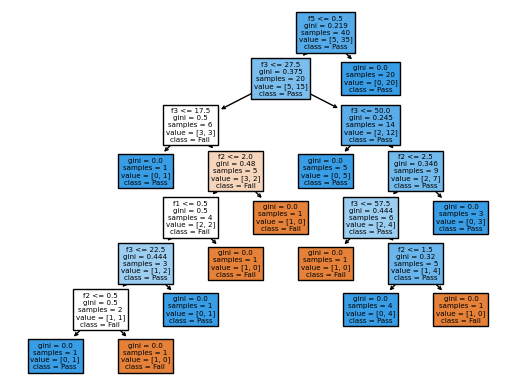

In [37]:
from sklearn import tree

_ = tree.plot_tree(ct,
                   feature_names= X.columns,
                   class_names=['Fail', 'Pass'],
                   filled=True)

# g)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ct2 = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
ct2.fit(X_train, y_train)
y_pred = ct2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1_score}")

Accuracy: 0.8181818181818182
Precision: 0.9
Recall: 0.9
F1 score: 0.9


# h)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10,15, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_params

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}

# i)

In [40]:

ct3 = DecisionTreeClassifier(max_depth=2, min_samples_split=10,criterion = 'gini')
ct3.fit(X_train, y_train)
y_pred = ct2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
#f1_score = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
#print(f"F1 score: {f1_score}")

Accuracy: 0.8181818181818182
Precision: 0.9
Recall: 0.9


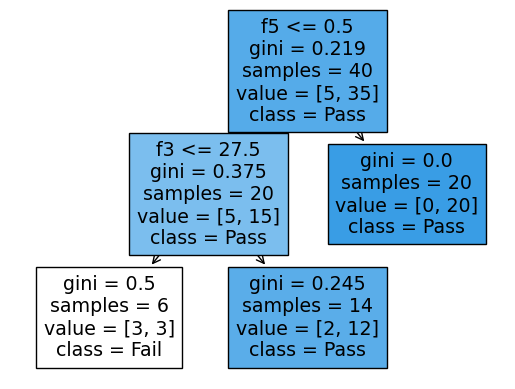

In [41]:
_ = tree.plot_tree(ct3,
                   feature_names= X.columns,
                   class_names=['Fail', 'Pass'],
                   filled=True)

In [42]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_pred, target_names=['fail', 'pass']))

              precision    recall  f1-score   support

        fail       0.00      0.00      0.00         1
        pass       0.90      0.90      0.90        10

    accuracy                           0.82        11
   macro avg       0.45      0.45      0.45        11
weighted avg       0.82      0.82      0.82        11

